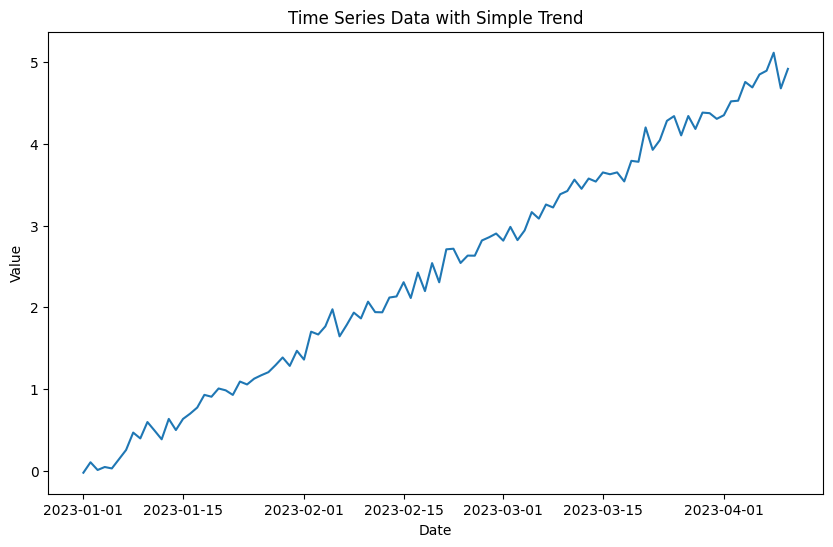

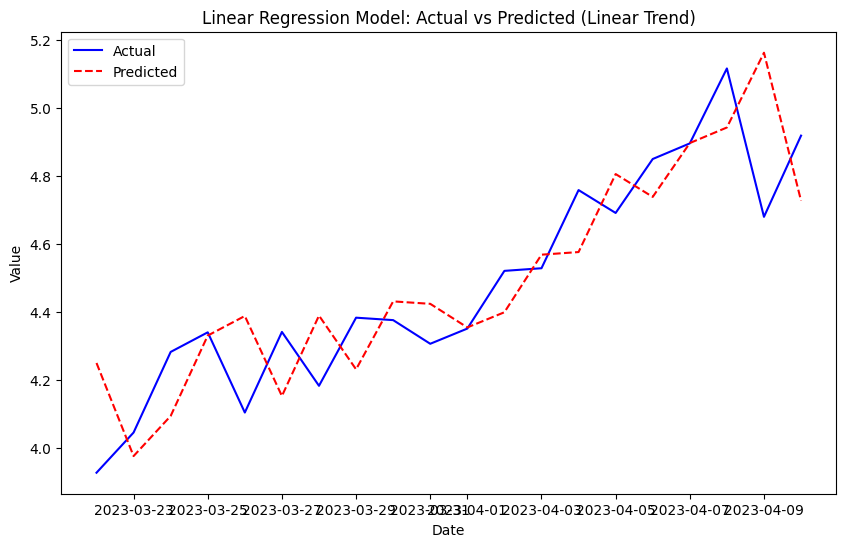

Mean Squared Error: 0.03593491128552847
R-squared: 0.6300706717680776


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dates = pd.date_range('2023-01-01', periods=100, freq='D')
values = 0.05 * np.arange(100) + np.random.normal(0, 0.1, 100)

data = pd.DataFrame({'Date': dates, 'Value': values})
data.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Time Series Data with Simple Trend")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

data['Lag_1'] = data['Value'].shift(1)
data.dropna(inplace=True)
X = data[['Lag_1']]
y = data['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title("Linear Regression Model: Actual vs Predicted (Linear Trend)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = model.score(X_test, y_test)
print("R-squared:", r2)


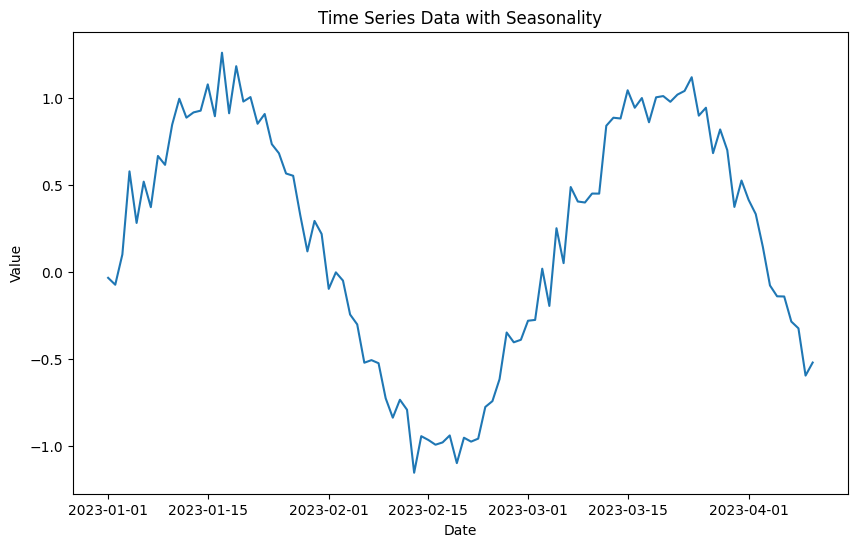

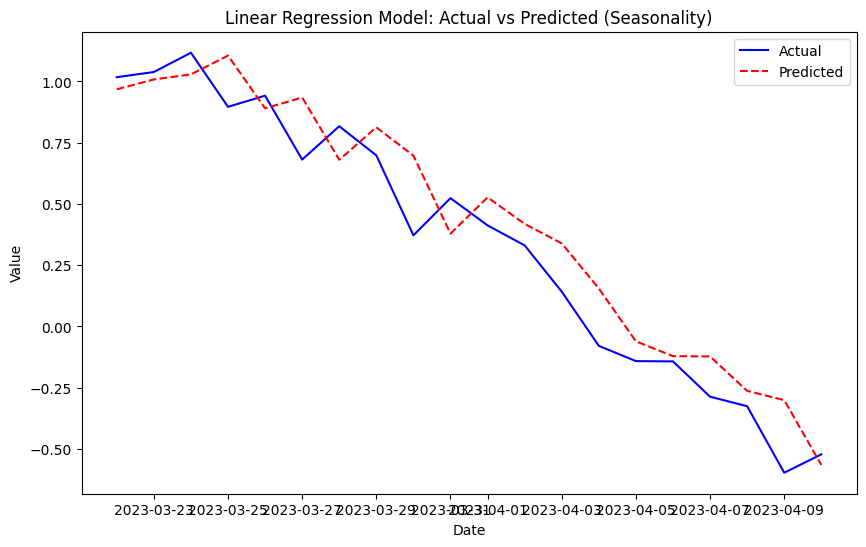

Mean Squared Error: 0.026134221406386653
R-squared: 0.9110269564814232


In [2]:
dates = pd.date_range('2023-01-01', periods=100, freq='D')
values = np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.1, 100)

data = pd.DataFrame({'Date': dates, 'Value': values})
data.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Time Series Data with Seasonality")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

data['Lag_1'] = data['Value'].shift(1)
data.dropna(inplace=True)

X = data[['Lag_1']]
y = data['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title("Linear Regression Model: Actual vs Predicted (Seasonality)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = model.score(X_test, y_test)
print("R-squared:", r2)